In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Data Acquisition

In [2]:
df = pd.read_csv('data.csv')
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Exploratory Data Analysis

In [3]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
# make the indexes of the column names uniform
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [5]:
# make the string values of rows uniform
strings = list(df.select_dtypes('object'))
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
for col in strings:
    df[strings].apply(lambda x : x.str.lower().str.replace(' ','_'))

In [108]:
df.head(11)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler']
48

model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class']
915

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE' 'UNKNOWN']
5

driven_wheels
['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['Factory Tuner,Luxury,High-Performance' 'Luxury,Performance'
 'Luxury,High-Performance' 'Luxury' 'Performance']
71

vehicle_size
['Compact' 'Midsize' 'Large']
3

vehicle_style
['Coupe' 'Convertible' 'Sedan' 'Wagon' '4dr Hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

<Axes: xlabel='msrp', ylabel='Count'>

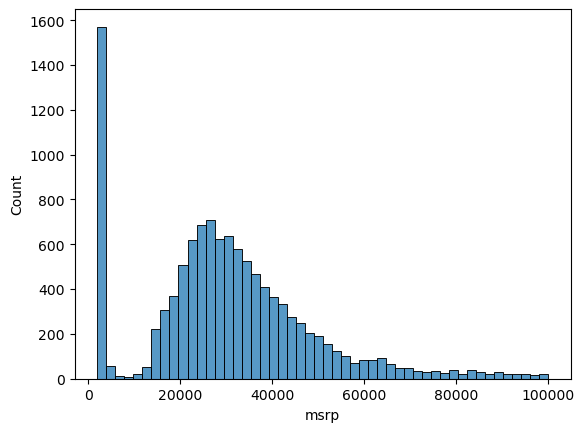

In [10]:
#visualize the MRSP price
sns.histplot(df.msrp[df['msrp'] < 100000] , bins = 50)

In [11]:
#From the graph we can see it is a tail end graph
# Apply Logarithmic function to avoid confusing the ML model(remove the tail-end of graph)
log_price = np.log1p(df['msrp'])
log_price

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

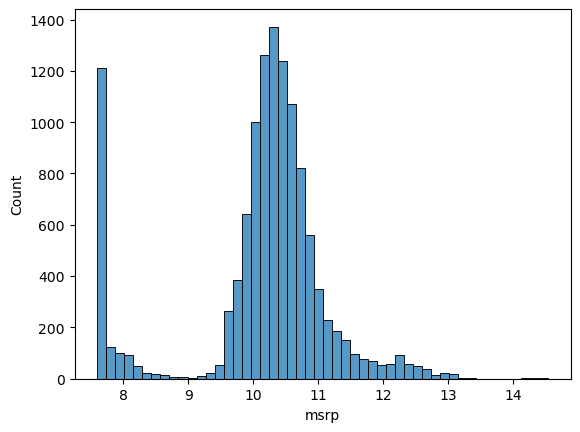

In [12]:
sns.histplot(log_price, bins= 50)

In [13]:
#Now the graph resembels a bell curve

#### Check & clean missing values

In [14]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Setting Up Validation Framework 
###### Train -- Validation -- Test
###### 60% of data for Train 
###### 20% of data for Validation
###### 20% of data for Testing

In [15]:
# size of data
size = len(df)
size

11914

In [16]:
#calculate how much is needed for validation,testing and training
val_size = int(size * 0.2)
test_size = int(size * 0.2)

#since the above values are rounded, we subtract the sum of the val_size and test_size from size of dataset
train_size = size - (val_size + test_size)

val_size , test_size , train_size
#size,val_size + test_size + train_size

(2382, 2382, 7150)

In [17]:
#define validation, test and train datasets
# the dataset has to be shuffled inorder to distribute all features uniformly 
train_df = df.iloc[train_size :]
val_df = df.iloc[train_size: train_size + val_size]
test_df = df.iloc[train_size + val_size: ]

In [18]:
#shuffle the size of the dataset
idx  = np.arange(size)
np.random.shuffle(idx)
idx

array([10507,  9271,  9578, ...,   509,    62,  9187])

In [19]:
# the test, train and validation datasets will be declared through the shuffled dataset
train_df = df.iloc[idx[: train_size ]]
val_df = df.iloc[idx[train_size: train_size + val_size]]
test_df = df.iloc[idx[train_size + val_size: ]]

In [20]:
len(train_df),len(val_df),len(test_df)

(7150, 2382, 2382)

In [21]:
#reset the index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [22]:
#normalize msrp values
y_train = np.log1p(train_df.msrp.values)
y_val_df = np.log1p(val_df.msrp.values)
y_test_df = np.log1p(test_df.msrp.values)

In [23]:
#remove the msrp values
del(train_df['msrp'])
del(val_df['msrp'])
del(test_df['msrp'])

### Linear Regression
##### g(Xi)~~ yi -> g is the model, Xi is the feature matrix, and the yi is the  target value 
##### y = Wo + W1X1 + W2X2 +.....+WnXn
##### where y -> the dependent value
#### Wo -> the intercept 
#### W1-Wn -> slope or coefficient


In [24]:
train_df.iloc[10]

make                       Mitsubishi
model                          Lancer
year                             2017
engine_fuel_type     regular unleaded
engine_hp                       168.0
engine_cylinders                  4.0
transmission_type           AUTOMATIC
driven_wheels         all wheel drive
number_of_doors                   4.0
market_category                   NaN
vehicle_size                  Compact
vehicle_style                   Sedan
highway_mpg                        30
city_mpg                           23
popularity                        436
Name: 10, dtype: object

In [25]:
xi = [325,18, 5657]

In [26]:
w0 = 7.17
w = [0.01, 0.04, 0.02]

In [27]:
def linear_regression(xi):
    pred = w0
    for j in range(len(xi)):
        pred = pred + w[j] * xi[j]
        return pred

In [28]:
linear_regression(xi)

10.42

In [29]:
#since we normalized the msrp using log1p, we have to return the exponent value - 1
np.expm1(10.42)

33522.43414584466

### Linear Regression Vector Form 

In [30]:
def dot(xi, w):
    
    n = len(xi)
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
        return res

In [31]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [32]:
linear_regression(xi)

10.42

#### To make the last equation more simple, we can imagine there is one more feature xi0, that is always equal to 1.
####  g(xi) = w0 + xiTw -> g(xi) = w0 . xi0 + xi^T. w
#### That means vector w becomes a n+1 dimensional vector:
#### w = [w0, w1, w2, … wn]
#### xi = [xi0, xi1, xi2, …, xin] = [1, xi1, xi2, …, xin]
#### wTxi = xiTw = w0 + …

In [33]:
#applying the the formula on feature matrix
w0 = [w0]
w_new = w0 + w
w_new

[7.17, 0.01, 0.04, 0.02]

In [34]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

#create a list of lists X
X = [x1, x2, x10]
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

In [35]:
#create a numpy array out of X
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [36]:
#try on the model
def linear_regression(X):
    return X.dot(w_new)
 
y = linear_regression(X)
np.expm1(y) 

array([1.59781730e+16, 5.78757308e+21, 1.04549294e+06])

### Train LInear Regression Model
##### GRAM matrix => X^T * X
##### w = (X^T*X)^-1 * X^T*y


In [37]:
# 
X = [
    [148,24,1385],
    [132,25,2031],
    [453,11,86],
    [158,24,1385],
    [172,25,201],
    [413,11,86],
    [38,54,435],
    [142,25,431],
    [453,31,86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24, 1385],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  435],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [38]:
#define an aribitary array y
y = [100, 200, 150, 200, 250,200, 100, 150, 100]

In [39]:
#define the bias term -> since we assumed the values to be all 1's
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [40]:
#add the ones array to X array using np.column_stack()
X = np.column_stack([ones, X])


In [41]:
#first declare the GRAM matrix
gram_matrix = X.T.dot(X)
gram_matrix

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 6.126000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 9.176400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.611030e+05],
       [6.126000e+03, 9.176400e+05, 1.611030e+05, 8.398986e+06]])

In [42]:
# declare the inverse of the gram_matrix
gram_matrix_inv= np.linalg.inv(gram_matrix)
gram_matrix_inv

array([[ 4.19061567e+00, -6.97921826e-03, -7.06098585e-02,
        -9.39618391e-04],
       [-6.97921826e-03,  1.39881419e-05,  1.02138324e-04,
         1.60302948e-06],
       [-7.06098585e-02,  1.02138324e-04,  1.53735166e-03,
         1.08534313e-05],
       [-9.39618391e-04,  1.60302948e-06,  1.08534313e-05,
         4.21072015e-07]])

In [43]:
#the product of the gram matrix with its inverse should be an Identity matrix
gram_matrix.dot(gram_matrix_inv).round(1)

array([[ 1.,  0., -0., -0.],
       [ 0.,  1.,  0., -0.],
       [ 0.,  0.,  1., -0.],
       [-0.,  0., -0.,  1.]])

In [44]:
#calculate the weights w
w_full = gram_matrix_inv.dot(X.T).dot(y)
w_full

array([ 3.29287144e+02, -2.47314169e-01, -3.81623868e+00, -1.86522719e-02])

In [45]:
# Now we can find the two estimated coefficients W0 and W

#the first element is the intercept or bias term
W0 = w_full[0]

#the rest is the slope
W = w_full[1:]

In [46]:
W0

329.28714424414034

In [47]:
W

array([-0.24731417, -3.81623868, -0.01865227])

In [48]:
#define the above steps as a function
def train_linear_regression(X, y):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
    

In [49]:
train_linear_regression(X, y)

(2.2026114150969393e+19,
 array([-1.54958947e+19,  1.28727321e+00,  7.44355702e-16, -1.20000738e-02]))

### Car Price Baseline Model

In [50]:
#get all the numerical values from the training dataset
train_df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [51]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg','city_mpg', 'popularity']


In [52]:
train_df[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,290.0,6.0,31,21,204
1,295.0,8.0,19,14,549
2,355.0,8.0,22,16,1385
3,220.0,4.0,32,22,3105
4,200.0,4.0,31,22,873
...,...,...,...,...,...
7145,200.0,6.0,17,12,5657
7146,381.0,8.0,17,13,2031
7147,240.0,5.0,24,17,870
7148,200.0,4.0,31,21,873


In [53]:
#extract the values for training
X_train = train_df[base].values
X_train

array([[ 290.,    6.,   31.,   21.,  204.],
       [ 295.,    8.,   19.,   14.,  549.],
       [ 355.,    8.,   22.,   16., 1385.],
       ...,
       [ 240.,    5.,   24.,   17.,  870.],
       [ 200.,    4.,   31.,   21.,  873.],
       [ 288.,    6.,   22.,   15.,  155.]])

In [54]:
#we've already declared the y_train
y_train

array([10.63587948, 10.33611377, 10.71821057, ...,  7.60140233,
       10.3220663 , 10.76882178])

In [55]:
#before training the model, check for null values
train_df[base].isna().sum()

engine_hp           43
engine_cylinders    21
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [56]:
#fill the null with 0
X_train = train_df[base].fillna(0).values


In [57]:
X_train

array([[ 290.,    6.,   31.,   21.,  204.],
       [ 295.,    8.,   19.,   14.,  549.],
       [ 355.,    8.,   22.,   16., 1385.],
       ...,
       [ 240.,    5.,   24.,   17.,  870.],
       [ 200.,    4.,   31.,   21.,  873.],
       [ 288.,    6.,   22.,   15.,  155.]])

In [58]:
#train the linear_regression model
W0, W = train_linear_regression(X_train, y_train)

In [59]:
#calculate the y_prediction value
y_prediction = W0 + X_train.dot(W)

<Axes: ylabel='Count'>

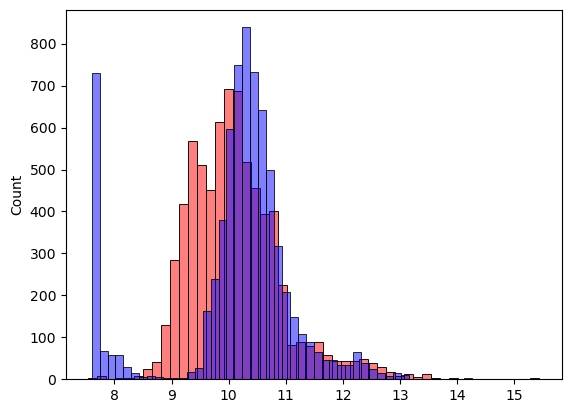

In [60]:
#compare the y_prediction with y_train graph
sns.histplot(y_prediction, color='red', alpha = 0.5,bins=50)
sns.histplot(y_train, color='blue', alpha = 0.5, bins= 50)

# Root Mean Square Error(RMSE)

###### RMSE = sqrt(E(y-actual - y-pred)^2 / m)
###### where y-actual is the actual value
###### y-pred is the predicted value 
##### m is the number of observations

In [61]:
#RMSE function
def rmse(y, y_pred): 
    sqr_error = (y - y_pred) ** 2
    mean_sqr_error = sqr_error.mean()
    
    return np.sqrt(mean_sqr_error)
    

In [62]:
rmse(y_train, y_prediction)

0.7484853390489385

### Validating the model

In [63]:
# write a function to prepare data
def prepare_X(df):
    
    #first extract numerical values
    df_num = df[base]
    
    #fill the null values
    df_num = df_num.fillna(0)
    
    X = df_num.values
    
    return X 

In [64]:
X_train = prepare_X(train_df)
W0, W = train_linear_regression(X_train, y_train)

X_val = prepare_X(val_df)
y_pred = W0 + X_val.dot(W)

rmse(y_val_df, y_pred)

0.7529194105363366

### Simple Feature Engineering

In [65]:
#returns the age of the cars
# subtract the year column from the last year the data was collected
age = train_df.year.max() - train_df.year
age

0        0
1       10
2        1
3        1
4        1
        ..
7145    20
7146     0
7147    22
7148     4
7149     1
Name: year, Length: 7150, dtype: int64

In [66]:
# add a new column age to the train_df dataframe
def prepare_X(df):
    
    #first make a copy of the df inorder not to modify the original df
    df = df.copy()
    df['age'] = df.year.max() - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [67]:
X_train = prepare_X(train_df)

W0, W = train_linear_regression(X_train, y_train)

X_val = prepare_X(val_df)
y_pred = W0 + X_val.dot(W)

rmse(y_val_df, y_pred)

0.5327668037046062

<Axes: ylabel='Count'>

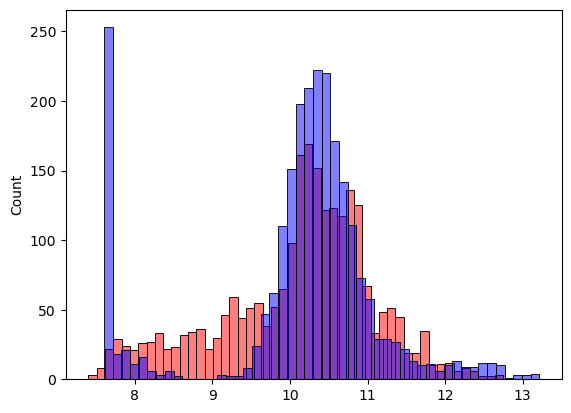

In [68]:
sns.histplot(y_pred, alpha=0.5, color='red', bins=50)
sns.histplot(y_val_df, alpha=0.5, color='blue', bins=50)

### Categorical Variables
##### Turning categorical feature into usable format

In [69]:
train_df.number_of_doors.nunique()

3

In [70]:
train_df.number_of_doors.values

array([4., 4., 4., ..., 4., 2., 4.])

In [71]:
#use for loop to create three new features for the 3 types of columns
for val in [2,3,4]:
    train_df['door_num_%s' %val] = (train_df.number_of_doors == val).astype('int')

In [72]:
train_df.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,door_num_2,door_num_3,door_num_4
0,Acura,TLX,2017,premium unleaded (recommended),290.0,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Sedan,31,21,204,0,0,1
1,GMC,Sierra 1500 Classic,2007,flex-fuel (unleaded/E85),295.0,8.0,AUTOMATIC,rear wheel drive,4.0,Flex Fuel,Large,Extended Cab Pickup,19,14,549,0,0,1
2,Chevrolet,Silverado 1500,2016,regular unleaded,355.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,22,16,1385,0,0,1
3,Audi,A4,2016,premium unleaded (required),220.0,4.0,MANUAL,all wheel drive,4.0,Luxury,Midsize,Sedan,32,22,3105,0,0,1
4,Volkswagen,CC,2016,premium unleaded (recommended),200.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Performance,Midsize,Sedan,31,22,873,0,0,1


In [73]:
#Prepare the new X_train and the above for loop 

def prepare_X(df):
    
    #first make a copy of the df inorder not to modify the original df and list
    df = df.copy()
    features = base.copy()
    
    df['age'] = df.year.max() - df.year
    features.append('age')
    
    for val in [2,3,4]:
        df['door_num_%s' %val] = (df.number_of_doors == val).astype('int')
        features.append('door_num_%s' %val)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [74]:
X_train = prepare_X(train_df)
W0, W = train_linear_regression(X_train, y_train)

X_val = prepare_X(val_df)
y_pred = W0 + X_val.dot(W)

rmse(y_val_df, y_pred)

0.5309334727905869

#### The added new feature didn't improve the model

In [75]:
#Use the make feature if there will be change
df.make.nunique()

48

In [76]:
#choose the top 5 popular cars 
makes = list(df.make.value_counts().head().index)

In [77]:
#loop through the list above to modify the feature and add the new features
def prepare_X(df):
    
    #first make a copy of the df inorder not to modify the original df and list
    df = df.copy()
    features = base.copy()
    
    df['age'] = df.year.max() - df.year
    features.append('age')
    
    for val in [2,3,4]:
        df['door_num_%s' %val] = (df.number_of_doors == val).astype('int')
        features.append('door_num_%s' %val)
    
    for val in makes:
        df['make_%s' %val] = (df.make == val).astype('int')
        features.append('make_%s' %val)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [78]:
X_train = prepare_X(train_df)
W0, W = train_linear_regression(X_train, y_train)

X_val = prepare_X(val_df)
y_pred = W0 + X_val.dot(W)

rmse(y_val_df, y_pred)

0.5216060053321118

In [79]:
#adding the rest of the categorical features
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [80]:
categorical_list = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
    'market_category', 'vehicle_size', 'vehicle_style',
]

In [81]:
#map the top 5 popular categories for each feature in list

categories={}

for c in categorical_list:
    categories[c] = list(df[c].value_counts().head().index)
    

In [82]:
categories

{'make': ['Chevrolet', 'Ford', 'Volkswagen', 'Toyota', 'Dodge'],
 'engine_fuel_type': ['regular unleaded',
  'premium unleaded (required)',
  'premium unleaded (recommended)',
  'flex-fuel (unleaded/E85)',
  'diesel'],
 'transmission_type': ['AUTOMATIC',
  'MANUAL',
  'AUTOMATED_MANUAL',
  'DIRECT_DRIVE',
  'UNKNOWN'],
 'driven_wheels': ['front wheel drive',
  'rear wheel drive',
  'all wheel drive',
  'four wheel drive'],
 'market_category': ['Crossover',
  'Flex Fuel',
  'Luxury',
  'Luxury,Performance',
  'Hatchback'],
 'vehicle_size': ['Compact', 'Midsize', 'Large'],
 'vehicle_style': ['Sedan',
  '4dr SUV',
  'Coupe',
  'Convertible',
  '4dr Hatchback']}

In [83]:
#now encode the new features and add them to the training matrix
def prepare_X(df):
    
    #first make a copy of the df inorder not to modify the original df and list
    df = df.copy()
    features = base.copy()
    
    df['age'] = df.year.max() - df.year
    features.append('age')
    
    for val in [2,3,4]:
        df['door_num_%s' %val] = (df.number_of_doors == val).astype('int')
        features.append('door_num_%s' %val)
        
    for c, values in categories.items():
        for val in values:
            df['%s_%s' %(c,val)] = (df[c] == val).astype('int')
            features.append('%s_%s' % (c,val))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [84]:
X_train = prepare_X(train_df)
W0, W = train_linear_regression(X_train, y_train)

X_val = prepare_X(val_df)
y_pred = W0 + X_val.dot(W)

rmse(y_val_df, y_pred)

169.52487626821818

In [85]:
int(W0)

-4064483284870361

### Regularization
##### Regularization is used to avoid overfitting and underfitting of our model

In [86]:
#introduce new regularization parameter r to the training model 
def train_linear_regression_reg(X, y, r=0.001):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
    

In [87]:
X_train = prepare_X(train_df)
W0, W = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(val_df)
y_pred = W0 + X_val.dot(W)

rmse(y_val_df, y_pred)

0.4730078970423926

### when our model is regularized, the output improved significantly

### Tuning the model

In [88]:
#check the model for different r values
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1]:
    X_train = prepare_X(train_df)
    W0, W = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(val_df)
    y_pred = W0 + X_val.dot(W)

    score = rmse(y_val_df, y_pred).round(2)
    print("For r: "+str(r)+" :score is :"+str(score))
    

For r: 0 :score is :169.52
For r: 1e-06 :score is :0.47
For r: 0.0001 :score is :0.47
For r: 0.001 :score is :0.47
For r: 0.01 :score is :0.47
For r: 0.1 :score is :0.47
For r: 1 :score is :0.48


### Using The Model

In [89]:
full_df = pd.concat([train_df, val_df])

In [90]:
full_df = full_df.reset_index(drop=True)
full_df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,door_num_2,door_num_3,door_num_4
0,Acura,TLX,2017,premium unleaded (recommended),290.0,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Sedan,31,21,204,0.0,0.0,1.0
1,GMC,Sierra 1500 Classic,2007,flex-fuel (unleaded/E85),295.0,8.0,AUTOMATIC,rear wheel drive,4.0,Flex Fuel,Large,Extended Cab Pickup,19,14,549,0.0,0.0,1.0
2,Chevrolet,Silverado 1500,2016,regular unleaded,355.0,8.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Crew Cab Pickup,22,16,1385,0.0,0.0,1.0
3,Audi,A4,2016,premium unleaded (required),220.0,4.0,MANUAL,all wheel drive,4.0,Luxury,Midsize,Sedan,32,22,3105,0.0,0.0,1.0
4,Volkswagen,CC,2016,premium unleaded (recommended),200.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Performance,Midsize,Sedan,31,22,873,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,Chevrolet,Traverse,2017,regular unleaded,281.0,6.0,AUTOMATIC,front wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,1385,NaN,NaN,NaN
9528,Lincoln,Aviator,2005,premium unleaded (required),302.0,8.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,4dr SUV,16,11,61,NaN,NaN,NaN
9529,Tesla,Model S,2016,electric,NaN,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105,102,1391,NaN,NaN,NaN
9530,Pontiac,Grand Prix,2007,regular unleaded,260.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,26,17,210,NaN,NaN,NaN


In [91]:
X_full_train = prepare_X(full_df)
X_full_train

array([[290.,   6.,  31., ...,   0.,   0.,   0.],
       [295.,   8.,  19., ...,   0.,   0.,   0.],
       [355.,   8.,  22., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0., 105., ...,   0.,   0.,   0.],
       [260.,   6.,  26., ...,   0.,   0.,   0.],
       [563.,  12.,  21., ...,   0.,   0.,   0.]])

In [95]:
y_full_train = np.concatenate([y_train, y_val_df])

In [96]:
W0, W = train_linear_regression_reg(X_full_train, y_full_train, r)

In [97]:
W0,W

(5.7915350026622585,
 array([ 1.48269971e-03,  1.09557500e-01, -3.05482872e-02,  1.19208641e-02,
        -4.85822947e-05, -9.96259653e-02,  4.80907368e-01,  3.00546983e-01,
         6.08572883e-01, -3.28983173e-02,  1.58188781e-01,  7.84808644e-03,
        -1.24689708e-01, -7.98373275e-02, -4.09431650e-01,  1.32983473e-01,
        -2.48684960e-01, -4.74374422e-01,  8.43735982e-02,  9.65116790e-01,
         7.72388942e-01,  9.94461752e-01,  2.69304105e+00,  3.66526470e-01,
         1.52783776e+00,  1.38672151e+00,  1.49376108e+00,  1.38321465e+00,
        -7.47315536e-02,  3.12053730e-02, -5.85991342e-02, -1.89083770e-02,
         2.02883510e-02,  2.00969941e+00,  1.89681558e+00,  1.88502002e+00,
         3.71459186e-02,  4.43195030e-02,  2.35197864e-01,  3.63378808e-01,
        -1.22163975e-01]))

In [98]:
X_test = prepare_X(test_df)
y_pred = W0 + X_test.dot(W)
rmse(y_test_df, y_pred)

0.5100874972299303

In [101]:
#let's use the model to predict a car
car = test_df.iloc[10].to_dict()
car

{'make': 'Ford',
 'model': 'Mustang',
 'year': 2016,
 'engine_fuel_type': 'regular unleaded',
 'engine_hp': 300.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'MANUAL',
 'driven_wheels': 'rear wheel drive',
 'number_of_doors': 2.0,
 'market_category': 'Performance',
 'vehicle_size': 'Midsize',
 'vehicle_style': 'Coupe',
 'highway_mpg': 28,
 'city_mpg': 17,
 'popularity': 5657}

In [102]:
df_car = pd.DataFrame([car])
df_car

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,Ford,Mustang,2016,regular unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Performance,Midsize,Coupe,28,17,5657


In [103]:
X_small = prepare_X(df_car)

In [104]:
y_pred = W0 + X_small.dot(W)
y_pred

array([10.48695091])

In [106]:
np.expm1(y_pred[0])

35843.69700462565

In [114]:
y_test_df[10]

10.091874013892333

In [116]:
np.expm1(10.091874013892333)

24145.000000000015

#### The Model gives fair prediction